<center>
    <h1 style = "font-size:24px; font-weight:normal">Uczenie maszynowe</h1>
    <h1 style = "font-size:24px">DermaMNIST</h1>
    <h1 style = "font-size:24px">Paweł Tumialis 180529</h1>
    <h1 style = "font-size:24px">Mateusz Połom 180565</h1>
    <h1 style = "font-size:24px">Sztuczna inteligencja</h1>
        <h1 style = "font-size:24px">14.06.2023</h1>
</center>

In [1]:
!pip install medmnist

     ---------------------------------------- 1.1/1.1 MB 6.3 MB/s eta 0:00:00
     --------------------------------------- 12.1/12.1 MB 10.7 MB/s eta 0:00:00
     -------------------------------------- 162.6/162.6 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 88.3/88.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.2/4.2 MB 14.7 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 13.6 MB/s eta 0:00:00
     -------------------------------------- 178.9/178.9 kB 5.4 MB/s eta 0:00:00
     ------------------------------------- 313.2/313.2 kB 18.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116947 sha256=f8a7f8d754a2206831c0c525a0dad6cf08ccee337524ba170465fbbe43dda07c
  Stored in directory: c:\users\mateu\appdata\local\pip\cache\wheels\20\e8\7b\003fc14f02f262dd4614aec55e41147c8

In [1]:
import matplotlib.pyplot as plt
from medmnist import DermaMNIST
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import random
import keras
import tensorflow as tf

In [43]:
#dataset=np.load("C:/Users/mateu/.medmnist/dermamnist.npz")
train_dataset = DermaMNIST(split='train', download=True)
test_dataset = DermaMNIST(split='test', download=True)
valid_dataset = DermaMNIST(split='val', download=True)

Using downloaded and verified file: C:\Users\pawel\.medmnist\dermamnist.npz
Using downloaded and verified file: C:\Users\pawel\.medmnist\dermamnist.npz
Using downloaded and verified file: C:\Users\pawel\.medmnist\dermamnist.npz


# Przetwarzanie wstępne

In [44]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [45]:
#print(dataset.files)
'''
train_images=dataset["train_images"]
val_images=dataset["val_images"]
test_images=dataset["test_images"]
train_labels=dataset["train_labels"]
val_labels=dataset["val_labels"]
test_labels=dataset["test_labels"]
'''
train_images=train_dataset.imgs
val_images=valid_dataset.imgs
test_images=test_dataset.imgs
train_labels=train_dataset.labels
val_labels=valid_dataset.labels
test_labels=test_dataset.labels
print(np.reshape(train_images[0],-1))
   
gray_train = rgb2gray(train_images)
gray_val = rgb2gray(val_images)
gray_test = rgb2gray(test_images)
#plt.imshow(gray_arr)
#gray_arr.shape

[158 111 117 ... 173 145 142]


In [46]:
print(np.unique(val_labels))
print(np.unique(test_labels))
print(np.unique(train_labels))      

[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]


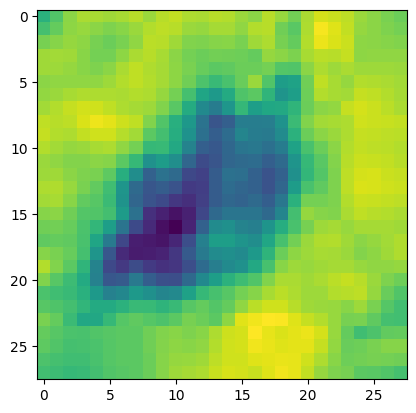

In [47]:
plt.imshow(gray_train[700])

In [48]:
gray_test.shape

(2005, 28, 28)

In [49]:
reshaped_train=train_images.reshape(7007,-1)
reshaped_val=val_images.reshape(1003,-1)
reshaped_test=test_images.reshape(2005,-1)
reshaped_test.shape

(2005, 2352)

# Algorytmy klasyczne

In [50]:
clf = svm.SVC(kernel="rbf", C=11)
clf.fit(reshaped_train, train_labels)

C:\Users\pawel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=11)

In [51]:
pred=clf.predict(reshaped_test)

In [52]:
test_labels

array([[5],
       [3],
       [4],
       ...,
       [5],
       [5],
       [5]], dtype=uint8)

# Wynik SVC

In [53]:
print("F1 score dla SVC = {}".format(metrics.fbeta_score(test_labels,pred,beta=1,average="weighted")))

F1 score dla SVC = 0.7315365354600791


In [14]:
metrics.confusion_matrix(test_labels,pred)

array([[  23,   16,   10,    1,    4,   11,    1],
       [  12,   51,    8,    0,    3,   29,    0],
       [   5,    9,   98,    0,   20,   88,    0],
       [   2,    9,    2,    3,    0,    7,    0],
       [   5,    6,   29,    1,   62,  120,    0],
       [   5,   16,   22,    0,   34, 1264,    0],
       [   2,    3,    4,    0,    2,    7,   11]], dtype=int64)

In [15]:
#0.6833340970259782 dla rbf c=9 gray
# array([[  12,   11,   14,    0,    3,   26,    0],
#        [   6,   17,    7,    0,    3,   70,    0],
#        [  10,    3,   56,    0,   14,  137,    0],
#        [   2,    2,    3,    0,    0,   16,    0],
#        [   3,    1,   20,    0,   56,  143,    0],
#        [   4,   13,   16,    0,   30, 1278,    0],
#        [   0,    0,    2,    0,    0,   27,    0]], dtype=int64)

# 0.7394007785408839 dla rbf c=9 color
# array([[  23,   16,   10,    1,    4,   11,    1],
#        [  12,   51,    8,    0,    3,   29,    0],
#        [   6,    7,   95,    0,   19,   93,    0],
#        [   2,    8,    2,    3,    0,    8,    0],
#        [   2,    7,   27,    1,   59,  127,    0],
#        [   5,   15,   22,    0,   34, 1265,    0],
#        [   2,    4,    3,    0,    1,    9,   10]], dtype=int64)

In [16]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 5)
rf.fit(reshaped_train, train_labels);

C:\Users\pawel\AppData\Local\Temp\ipykernel_1056\402083435.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(reshaped_train, train_labels);


In [19]:
rfpred=rf.predict(reshaped_val)

# Wynik drzew

In [20]:
print("F1 dla drzew = {}".format(metrics.fbeta_score(val_labels,rfpred,beta=1,average="weighted")))

F1 dla drzew = 0.654635053173812


In [22]:
metrics.confusion_matrix(val_labels,rfpred)

array([[  2,   5,   8,   0,   0,  18,   0],
       [  0,  24,   8,   0,   0,  20,   0],
       [  0,  11,  28,   0,   0,  71,   0],
       [  0,   7,   3,   0,   0,   2,   0],
       [  0,   2,   6,   0,  14,  89,   0],
       [  1,   3,  12,   0,   3, 652,   0],
       [  0,   0,   1,   0,   0,  13,   0]], dtype=int64)

# Proste DNN

In [30]:
from sklearn.preprocessing import OneHotEncoder
train = train_dataset.imgs
train_labels = train_dataset.labels
test = test_dataset.imgs
test_labels = test_dataset.labels
valid = valid_dataset.imgs
valid_labels = valid_dataset.labels

train_grey_re = np.ndarray(shape=(len(train), 28*28*3))
test_grey_re = np.ndarray(shape=(len(test), 28*28*3))
valid_grey_re = np.ndarray(shape=(len(valid), 28*28*3))
for i in range(len(train)):
    train_grey_re[i] = train[i].reshape((28*28*3))
for i in range(len(test)):
    test_grey_re[i] = test[i].reshape((28*28*3))
for i in range(len(valid)):
    valid_grey_re[i] = valid[i].reshape((28*28*3))
    
print(train_labels[1])
test_labels_f1 = test_labels
enc = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype='float32')
train_labels = enc.fit_transform(train_labels)
test_labels = enc.transform(test_labels)
valid_labels = enc.transform(valid_labels)
print(train_labels[1])

[5]
[0. 0. 0. 0. 0. 1. 0.]


C:\Users\pawel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
# to jest mały model i ma tendencję do wpadania w minima, jeśli sieć się nie uczy najlepiej zresetować uczenie
import tensorflow as tf
# opcje ------------
SHUFFLE_BUFFER_SIZE = 100
BATCH = 32
LR = 1e-5
LAYERS = 3
NEURONS = 24
EPOCHS = 250
# ---------------------
train_dataset = tf.data.Dataset.from_tensor_slices((train_grey_re, train_labels))
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_grey_re, valid_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_grey_re, test_labels))

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH)
valid_dataset = valid_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH)
test_dataset = test_dataset.batch(BATCH)

seed=random.seed()
np.random.seed(seed)
tf.compat.v1.random.set_random_seed(seed)
optimizer = tf.keras.optimizers.Adam(learning_rate=LR, beta_1=0.9, beta_2=0.999)
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(28*28*3,)))
for i in range(LAYERS):
    model.add(tf.keras.layers.Dense(units=NEURONS, activation='relu',use_bias=False))
model.add(tf.keras.layers.Dense(7, activation='relu',use_bias=False))
model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['categorical_accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 24)                56448     
                                                                 
 dense_5 (Dense)             (None, 24)                576       
                                                                 
 dense_6 (Dense)             (None, 24)                576       
                                                                 
 dense_7 (Dense)             (None, 7)                 168       
                                                                 
Total params: 57,768
Trainable params: 57,768
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
checkpoint_filepath = 'tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)
model_train = model.fit(train_dataset, validation_data=valid_dataset, epochs=EPOCHS, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)
model_evaluation = model.evaluate(test_dataset)

best_valid_accu = max(model_train.history['val_categorical_accuracy'])
best_epoch = model_train.history['val_categorical_accuracy'].index(best_valid_accu)
best_train_accu = model_train.history['categorical_accuracy'][best_epoch]
accuracy = model_evaluation[1]

Epoch 1/250
219/219 [==============================] - 2s 4ms/step - loss: 14.4443 - categorical_accuracy: 0.5166 - val_loss: 5.0979 - val_categorical_accuracy: 0.5783
Epoch 2/250
219/219 [==============================] - 1s 3ms/step - loss: 4.8249 - categorical_accuracy: 0.5656 - val_loss: 4.5530 - val_categorical_accuracy: 0.6122
Epoch 3/250
219/219 [==============================] - 1s 2ms/step - loss: 4.2840 - categorical_accuracy: 0.5726 - val_loss: 4.0693 - val_categorical_accuracy: 0.6142
Epoch 4/250
219/219 [==============================] - 0s 2ms/step - loss: 3.8336 - categorical_accuracy: 0.5784 - val_loss: 3.6500 - val_categorical_accuracy: 0.6102
Epoch 5/250
219/219 [==============================] - 1s 3ms/step - loss: 3.4668 - categorical_accuracy: 0.5777 - val_loss: 3.3760 - val_categorical_accuracy: 0.6201
Epoch 6/250
219/219 [==============================] - 1s 3ms/step - loss: 3.1433 - categorical_accuracy: 0.5780 - val_loss: 3.0978 - val_categorical_accuracy: 0.62

Epoch 50/250
219/219 [==============================] - 0s 2ms/step - loss: 1.0389 - categorical_accuracy: 0.6718 - val_loss: 1.0358 - val_categorical_accuracy: 0.6690
Epoch 51/250
219/219 [==============================] - 0s 2ms/step - loss: 1.0341 - categorical_accuracy: 0.6719 - val_loss: 1.0338 - val_categorical_accuracy: 0.6680
Epoch 52/250
219/219 [==============================] - 1s 2ms/step - loss: 1.0327 - categorical_accuracy: 0.6730 - val_loss: 1.0337 - val_categorical_accuracy: 0.6690
Epoch 53/250
219/219 [==============================] - 1s 3ms/step - loss: 1.0339 - categorical_accuracy: 0.6706 - val_loss: 1.0292 - val_categorical_accuracy: 0.6680
Epoch 54/250
219/219 [==============================] - 1s 3ms/step - loss: 1.0294 - categorical_accuracy: 0.6728 - val_loss: 1.0294 - val_categorical_accuracy: 0.6670
Epoch 55/250
219/219 [==============================] - 0s 2ms/step - loss: 1.0300 - categorical_accuracy: 0.6716 - val_loss: 1.0275 - val_categorical_accuracy:

Epoch 99/250
219/219 [==============================] - 0s 2ms/step - loss: 0.9369 - categorical_accuracy: 0.6772 - val_loss: 0.9467 - val_categorical_accuracy: 0.6750
Epoch 100/250
219/219 [==============================] - 0s 2ms/step - loss: 0.9336 - categorical_accuracy: 0.6782 - val_loss: 0.9549 - val_categorical_accuracy: 0.6770
Epoch 101/250
219/219 [==============================] - 0s 2ms/step - loss: 0.9346 - categorical_accuracy: 0.6783 - val_loss: 0.9393 - val_categorical_accuracy: 0.6810
Epoch 102/250
219/219 [==============================] - 0s 2ms/step - loss: 0.9306 - categorical_accuracy: 0.6786 - val_loss: 0.9510 - val_categorical_accuracy: 0.6780
Epoch 103/250
219/219 [==============================] - 0s 2ms/step - loss: 0.9327 - categorical_accuracy: 0.6805 - val_loss: 0.9516 - val_categorical_accuracy: 0.6760
Epoch 104/250
219/219 [==============================] - 0s 2ms/step - loss: 0.9343 - categorical_accuracy: 0.6789 - val_loss: 0.9413 - val_categorical_accu

219/219 [==============================] - 0s 2ms/step - loss: 0.9102 - categorical_accuracy: 0.6822 - val_loss: 0.9358 - val_categorical_accuracy: 0.6810
Epoch 148/250
219/219 [==============================] - 0s 2ms/step - loss: 0.9088 - categorical_accuracy: 0.6795 - val_loss: 0.9382 - val_categorical_accuracy: 0.6790
Epoch 149/250
219/219 [==============================] - 0s 2ms/step - loss: 0.9100 - categorical_accuracy: 0.6809 - val_loss: 0.9360 - val_categorical_accuracy: 0.6790
Epoch 150/250
219/219 [==============================] - 0s 2ms/step - loss: 0.9103 - categorical_accuracy: 0.6815 - val_loss: 0.9372 - val_categorical_accuracy: 0.6800
Epoch 151/250
219/219 [==============================] - 1s 2ms/step - loss: 0.9087 - categorical_accuracy: 0.6827 - val_loss: 0.9256 - val_categorical_accuracy: 0.6839
Epoch 152/250
219/219 [==============================] - 1s 2ms/step - loss: 0.9076 - categorical_accuracy: 0.6815 - val_loss: 0.9280 - val_categorical_accuracy: 0.6830


219/219 [==============================] - 1s 2ms/step - loss: 0.8935 - categorical_accuracy: 0.6849 - val_loss: 0.9198 - val_categorical_accuracy: 0.6839
Epoch 196/250
219/219 [==============================] - 0s 2ms/step - loss: 0.8939 - categorical_accuracy: 0.6842 - val_loss: 0.9273 - val_categorical_accuracy: 0.6820
Epoch 197/250
219/219 [==============================] - 1s 2ms/step - loss: 0.8945 - categorical_accuracy: 0.6852 - val_loss: 0.9194 - val_categorical_accuracy: 0.6800
Epoch 198/250
219/219 [==============================] - 0s 2ms/step - loss: 0.8914 - categorical_accuracy: 0.6839 - val_loss: 0.9219 - val_categorical_accuracy: 0.6800
Epoch 199/250
219/219 [==============================] - 0s 2ms/step - loss: 0.8952 - categorical_accuracy: 0.6833 - val_loss: 0.9289 - val_categorical_accuracy: 0.6790
Epoch 200/250
219/219 [==============================] - 0s 2ms/step - loss: 0.8944 - categorical_accuracy: 0.6842 - val_loss: 0.9239 - val_categorical_accuracy: 0.6830


219/219 [==============================] - 0s 2ms/step - loss: 0.8864 - categorical_accuracy: 0.6846 - val_loss: 0.9155 - val_categorical_accuracy: 0.6780
Epoch 244/250
219/219 [==============================] - 0s 2ms/step - loss: 0.8843 - categorical_accuracy: 0.6857 - val_loss: 0.9112 - val_categorical_accuracy: 0.6800
Epoch 245/250
219/219 [==============================] - 0s 2ms/step - loss: 0.8829 - categorical_accuracy: 0.6853 - val_loss: 0.9273 - val_categorical_accuracy: 0.6750
Epoch 246/250
219/219 [==============================] - 0s 2ms/step - loss: 0.8827 - categorical_accuracy: 0.6849 - val_loss: 0.9167 - val_categorical_accuracy: 0.6760
Epoch 247/250
219/219 [==============================] - 0s 2ms/step - loss: 0.8836 - categorical_accuracy: 0.6856 - val_loss: 0.9204 - val_categorical_accuracy: 0.6750
Epoch 248/250
219/219 [==============================] - 0s 2ms/step - loss: 0.8829 - categorical_accuracy: 0.6845 - val_loss: 0.9145 - val_categorical_accuracy: 0.6770


In [38]:
print('Dokładność modelu {}'.format(accuracy))
from sklearn.metrics import f1_score
images, labels = tuple(zip(*test_dataset))
y_pred1 = model.predict(test_grey_re)
y_pred = np.argmax(y_pred1, axis=1)
y_pred = y_pred.reshape(len(test_labels_f1), 1)
print('F1 score modelu = {}'.format(f1_score(test_labels_f1, y_pred , average="weighted")))

Dokładność modelu 0.6688279509544373
63/63 [==============================] - 0s 1ms/step
F1 score modelu = 0.5745788431537144
